# Module Two Discussion: The Central Limit Theorem

This notebook contains the step-by-step directions for your Module Two discussion. It is very important to run through the steps in order. Some steps depend on the outputs of earlier steps. Once you have completed the steps in this notebook, be sure to answer the questions about this activity in the Discussion for this module.

Reminder: If you have not already reviewed the discussion prompt, please do so before beginning this activity. That will give you an idea of the questions you will need to answer with the outputs of this script.


## Initial post (due Thursday)
_____________________________________________________________________________________________________________________________________________________

### Step 1: Generating population data
This block of Python code will generate unique TPCP population data of size 500 observations. You will use this data set in this week's discussion. The numpy module in Python can be used to create datasets with a skewed distribution by randomly generating data from a gamma distribution. You do not need to know what a gamma distribution is or how a dataset is drawn from it. The dataset will be saved in a Python dataframe that you will use in later calculations. 

Click the block of code below and hit the **Run** button above.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

# use gamma distribution to randomly generate 500 observations. 
shape, scale = 1.95, 2.5
tpcp = 100*np.random.gamma(shape, scale, 500)

# pandas library can be used to convert the array into a dataframe of rounded figures with the column name TPCP.
tpcp_df = pd.DataFrame(tpcp, columns=['TPCP'])
tpcp_df = tpcp_df.round(0)

# print the dataframe to see the first 5 and last 5 observations (note that the index of dataframe starts at 0).
print("TPCP data frame\n")
print(tpcp_df)

TPCP data frame

       TPCP
0    1057.0
1     854.0
2     477.0
3     261.0
4     260.0
..      ...
495   323.0
496   618.0
497   340.0
498   507.0
499  1106.0

[500 rows x 1 columns]


### Step 2: Creating a histogram plot of population data
You will use the matplotlib module in Python to create a histogram plot of the population data from Step 1. This plot allows you to visualize the population data distribution and confirm that it is skewed. You will use 50 bins in the histogram to display the distribution. 

Click the block of code below and hit the **Run** button above.  
NOTE: If the graph is not created, click the code section and hit the **Run** button again.

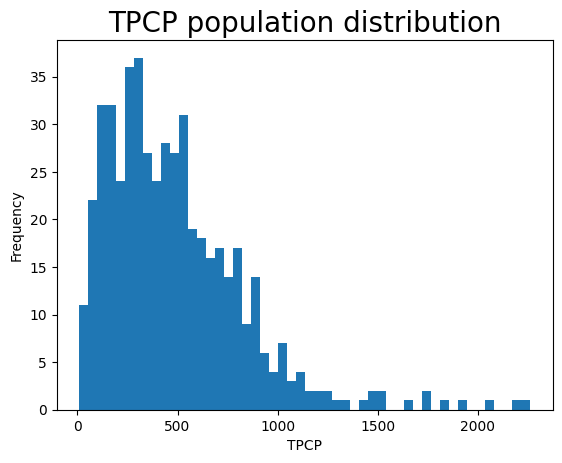

In [3]:
# create a figure for the plot. 
fig, ax = plt.subplots()

# create a histogram plot with 50 bins of TPCP population data. 
plt.hist(tpcp_df['TPCP'], bins=50)

# set a title for the plot, x-axis, and y-axis.
plt.title('TPCP population distribution', fontsize=20)
ax.set_xlabel('TPCP')
ax.set_ylabel('Frequency')

# show the plot.
plt.show()

### Step 3: Calculating the population mean
This step will calculate the mean for the population data. 

Click the block of code below and hit the **Run** button above.

In [4]:
# You can use the "mean" method of a pandas dataframe.
pop_mean = tpcp_df['TPCP'].mean()
print("Population mean =", round(pop_mean,2))

Population mean = 487.17


### Step 4: Drawing one random sample from the population data and calculating the sample mean
This block of code randomly selects one sample (with replacement) of 50 data points from the population data. Then it calculates the sample mean. You will use the "sample" method of the dataframe to select the sample. 

Click the block of code below and hit the **Run** button above.

In [5]:
# use sample method of the dataframe to select a random sample, with replacement, of size 50.
tpcp_sample_df = tpcp_df.sample(50, replace=True)

# print the sample mean.
sample_mean = tpcp_sample_df['TPCP'].mean()
print("Sample mean =", round(sample_mean,2))

Sample mean = 433.62


### Step 5: Repeatedly drawing samples and saving the sample mean for each sample
You will now essentially repeat Step 4 one thousand times to select 1,000 random samples, with replacement, of size 50 from the population data. The code below contains a loop so that you can do this selection with just one click! You will save the sample mean for each sample in a Python dataframe. 

Click the block of code below and hit the **Run** button above.

In [6]:
# run a for loop to repeat the process Step 4 one thousand times to select one thousand samples.
# save the mean of each sample that was drawn in a Python list called means_list.
means_list = []
for i in range(1000):
    tpcp_sample_df = tpcp_df.sample(50, replace=True)
    sample_mean = tpcp_sample_df['TPCP'].mean()
    means_list.append(sample_mean)
    
# create a Python dataframe of means.
means_df = pd.DataFrame(means_list, columns=['means'])
print("Dataframe of 1000 sample means\n")
print(means_df)

Dataframe of 1000 sample means

      means
0    510.88
1    476.32
2    508.34
3    478.72
4    514.62
..      ...
995  508.98
996  452.84
997  535.78
998  399.48
999  466.92

[1000 rows x 1 columns]


### Step 6: Creating a histogram plot of the sample means from Step 5
Now you will plot the data distribution of the 1,000 means from Step 5. View the plot to confirm that it approximates a Normal distribution (bell-shaped curve). Note that the original data distribution in Step 2 was skewed. However, the distribution of sample means, calculated by repeatedly drawing large samples, is approximately Normally distributed. 

Click the block of code below and hit the **Run** button above.  
NOTE: If the graph is not created, click the code section and hit the **Run** button again.

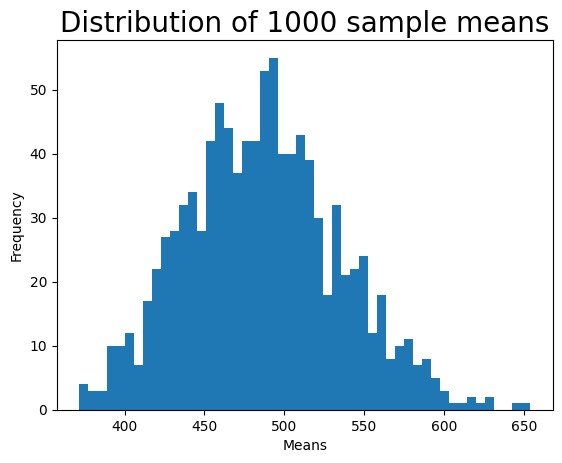

In [7]:
# create a figure for the plot. 
fig, ax = plt.subplots()

# create a histogram plot with 50 bins of 1,000 means. 
plt.hist(means_df['means'], bins=50)

# set a title for the plot, x-axis and y-axis.
plt.title('Distribution of 1000 sample means', fontsize=20) # title
ax.set_xlabel('Means')
ax.set_ylabel('Frequency')

# show the plot.
plt.show()

### Step 7: Mean and the standard deviation of the sample mean distribution
Now you will calculate the "grand" mean ("grand" because it is the mean of the 1,000 means) and the standard deviation of 1,000 sample means. Note that the distribution of sample means was approximately Normal (bell-shaped) in Step 6. Therefore, calculating the mean and the standard deviation of this distribution will allow us to calculate probabilities and critical values. 

Click the block of code below and hit the **Run** button above. 

In [8]:
# calculate mean of the 1,000 sample means (this is called the grand mean or mean of the means).
mean1000 = means_df['means'].mean()
print("Grand Mean (Mean of 1000 sample means) =",round(mean1000,2))

# calculate standard deviation of the 1,000 sample means.
std1000 = means_df['means'].std()
print("Std Deviation of 1000 sample means =",round(std1000,2))

# print the probability that a specific mean is 450 or less for a Normal distribution with mean and standard deviation of 1,000 sample means.
prob_450_less_or_equal = st.norm.cdf(450, mean1000, std1000)
print("Probability that a specific mean is 450 or less =", round(prob_450_less_or_equal,4))

Grand Mean (Mean of 1000 sample means) = 486.26
Std Deviation of 1000 sample means = 48.14
Probability that a specific mean is 450 or less = 0.2257


## End of initial post
Attach the HTML output to your initial post in the Module Two discussion. The html output can be downloaded by clicking **File**, then **Download as**, then **HTML**. Be sure to answer all questions about this activity in the Module Two discussion.

## Follow-up posts (due Sunday)
Return to the Module Two discussion to answer the follow-up questions in your response posts to other students. There are no Python scripts to run for your follow-up posts.